## Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [2]:
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
boston = load_boston()
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['target'] = boston.target

#split variables
Y = df.target
X = sm.add_constant(data =df.drop(['target'], axis= 1))

ys = (df.target).tolist()
xs = sm.add_constant(np.linspace(0,10,1000)).tolist()
#80/20 split
X_train , X_test, Y_train , Y_test = train_test_split(X,Y, test_size = 0.2)

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# defining the model 
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# defining the model in OLS
model = sm.OLS(Y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     80.33
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          1.36e-101
Time:                        12:46:38   Log-Likelihood:                -1210.9
No. Observations:                 404   AIC:                             2450.
Df Residuals:                     390   BIC:                             2506.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.9889      5.967      6.870      0.000      29.258      52.719
CRIM          -0.1148      0.035     -3.286      0.001      -0.184      -0.046
ZN             0.0493      0.016      3.063      0.002       0.018       0.081
INDUS          0.0052      0.072      0.072      0.943      -0.137       0.147
CHAS           3.0704      0.964      3.185      0.002       1.175       4.966
NOX          -20.7892      4.479     -4.642      0.000     -29.595     -11.984
RM             3.4207      0.470      7.281      0.000       2.497       4.344
AGE            0.0095      0.015      0.626      0.532      -0.020       0.039
DIS           -1.5711      0.230     -6.839      0.000      -2.023      -1.119
RAD            0.3514      0.075      4.656      0.000       0.203       0.500
TAX           -0.0129      0.004     -2.967      0.003      -0.021      -0.004
PTRATIO       -0.9993      0.159     -6.275      0.000      -1.312      -0.686
B              0.0099      0.003      3.256      0.001       0.004       0.016
LSTAT         -0.5250      0.056     -9.335      0.000      -0.636      -0.414
==============================================================================
Omnibus:                      132.038   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.006
Skew:                           1.433   Prob(JB):                    1.77e-106
Kurtosis:                       7.552   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\allis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\allis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM', ylabel='target'>

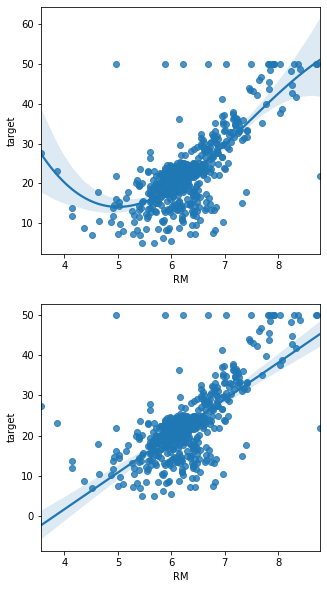

In [6]:
fig, ax = plt.subplots(2, figsize=(5, 10))
sns.regplot(df['RM'],Y,order = 3,ax=ax[0])
sns.regplot(df['RM'],Y,ax = ax[1])